# **Iris Dataset Preprocessing - Outlier, Missing Values, Skewness, Normalization**

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt # data visualization
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns # statistical data visualization
sns.set(style='whitegrid',color_codes=True)
import warnings as war
war.filterwarnings('ignore')
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import Image
import pydotplus
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import datasets
#from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes

from sklearn.datasets import load_iris
#from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Load Iris dataset
iris = pd.read_csv("/content/drive/MyDrive/ML_lab work /Dataset_Cleaning_and_Preprocessing/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Block 2: Check Data Info & Summary**

In [5]:
# Check structure and types
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [6]:
# Summary statistics
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


# **Block 3: Central Tendency (Mean, Median, Mode)**

In [7]:
print("\n🔸 Central Tendency Measures:")

# Mean, Median of numerical features
print("Mean of SepalLengthCm:", iris['SepalLengthCm'].mean())
print("Median of SepalLengthCm:", iris['SepalLengthCm'].median())

# Mode of categorical column
print("Mode of Species:", iris['Species'].mode()[0])


🔸 Central Tendency Measures:
Mean of SepalLengthCm: 5.843333333333334
Median of SepalLengthCm: 5.8
Mode of Species: Iris-setosa


# **Block 4: Visualize Distributions and Boxplots**

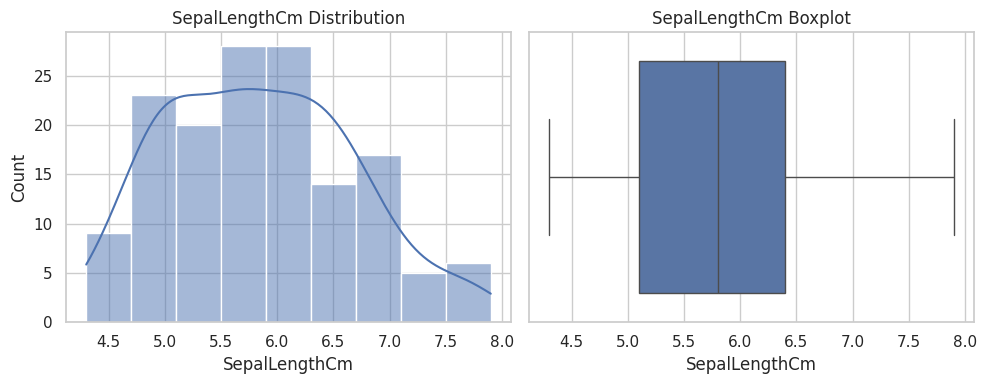

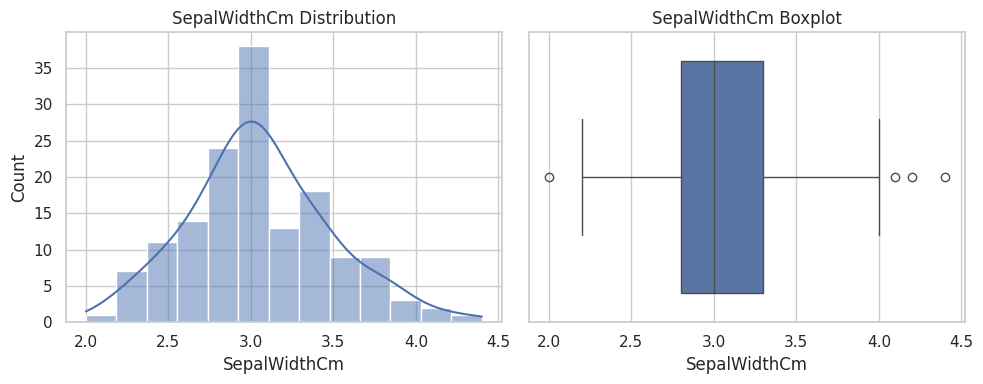

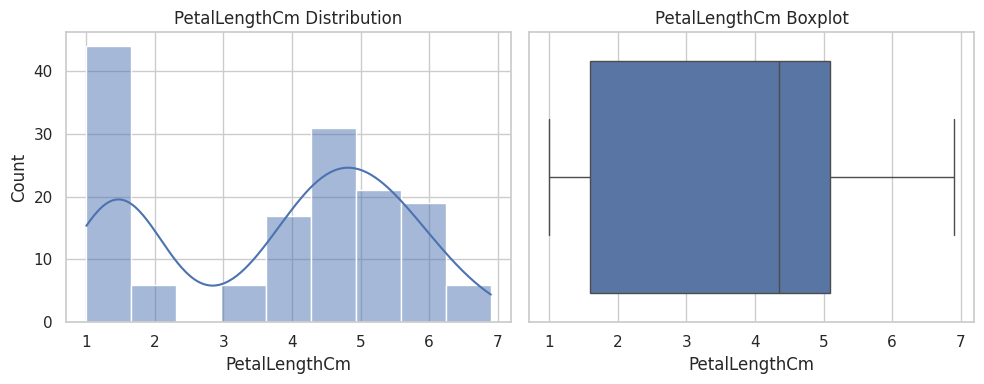

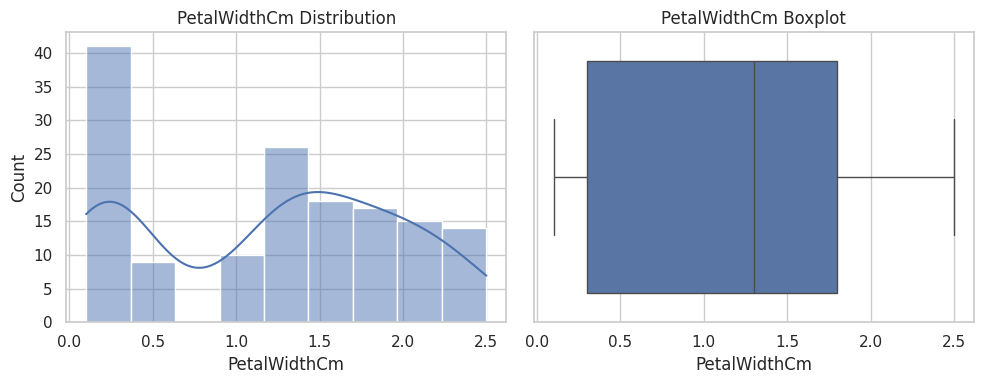

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram + Boxplot for all numeric features
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in features:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(iris[col], kde=True)
    plt.title(f'{col} Distribution')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=iris[col])
    plt.title(f'{col} Boxplot')

    plt.tight_layout()
    plt.show()

# **Block 5: Check Skewness**

In [9]:
from scipy.stats import skew

print("\n🔸 Skewness of Numeric Features:")
for col in features:
    col_skew = skew(iris[col])
    print(f'{col}: Skewness = {col_skew:.2f}')


🔸 Skewness of Numeric Features:
SepalLengthCm: Skewness = 0.31
SepalWidthCm: Skewness = 0.33
PetalLengthCm: Skewness = -0.27
PetalWidthCm: Skewness = -0.10


# **Simulate Missing Values (for practice)**

In [10]:
import numpy as np
# Simulate missing values
iris.loc[5, 'SepalLengthCm'] = np.nan
iris.loc[10, 'Species'] = np.nan

In [11]:
# Print the affected rows to verify the missing values
print(iris.loc[[5, 10]])

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
5    6            NaN           3.9            1.7           0.4  Iris-setosa
10  11            5.4           3.7            1.5           0.2          NaN


# **Block 7: Missing Value Treatment**

In [12]:
# Fill numeric column with median (safe in presence of outliers)
iris['SepalLengthCm'].fillna(iris['SepalLengthCm'].median(), inplace=True)

# Fill categorical with mode
iris['Species'].fillna(iris['Species'].mode()[0], inplace=True)

# **Block 8: Outlier Detection Using IQR**

In [13]:
print("\n🔸 IQR Outlier Detection:")

for col in features:
    Q1 = iris[col].quantile(0.25)
    Q3 = iris[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = iris[(iris[col] < lower) | (iris[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


🔸 IQR Outlier Detection:
SepalLengthCm: 0 outliers
SepalWidthCm: 4 outliers
PetalLengthCm: 0 outliers
PetalWidthCm: 0 outliers


# **Block 9: Outlier Detection Using Z-Score**

In [14]:
from scipy.stats import zscore

print("\n🔸 Z-Score Outlier Detection:")

for col in features:
    z = zscore(iris[col])
    outliers = iris[np.abs(z) > 3]
    print(f"{col}: {len(outliers)} outliers (Z > 3)")


🔸 Z-Score Outlier Detection:
SepalLengthCm: 0 outliers (Z > 3)
SepalWidthCm: 1 outliers (Z > 3)
PetalLengthCm: 0 outliers (Z > 3)
PetalWidthCm: 0 outliers (Z > 3)


# **Block 10: Standard Deviation**

In [15]:
print("\n🔸 Standard Deviation of Features:")
for col in features:
    std_dev = iris[col].std()
    print(f"{col}: SD = {std_dev:.2f}")


🔸 Standard Deviation of Features:
SepalLengthCm: SD = 0.83
SepalWidthCm: SD = 0.43
PetalLengthCm: SD = 1.76
PetalWidthCm: SD = 0.76


# **Block 11: Z-Score Normalization**

In [16]:
print("\n🔸 Z-Score Normalization (Standardization):")

# Standardize and add new columns
for col in features:
    iris[col + '_z'] = zscore(iris[col])

# Show first 5 rows
iris[[f + '_z' for f in features]].head()


🔸 Z-Score Normalization (Standardization):


,SepalLengthCm_z,SepalWidthCm_z,PetalLengthCm_z,PetalWidthCm_z
0,-0.904779,1.032057,-1.341272,-1.312977
1,-1.147348,-0.124958,-1.341272,-1.312977
2,-1.389916,0.337848,-1.398138,-1.312977
3,-1.511200,0.106445,-1.284407,-1.312977
4,-1.026064,1.263460,-1.341272,-1.312977


# **Block 12: Outlier Treatment – Remove or Cap**

In [17]:
# Option: Cap outliers using IQR

for col in features:
    Q1 = iris[col].quantile(0.25)
    Q3 = iris[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    iris[col + '_capped'] = iris[col].clip(lower, upper)

# Check updated capped values
iris[[col + '_capped' for col in features]].head()

,SepalLengthCm_capped,SepalWidthCm_capped,PetalLengthCm_capped,PetalWidthCm_capped
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_z,SepalWidthCm_z,PetalLengthCm_z,PetalWidthCm_z,SepalLengthCm_capped,SepalWidthCm_capped,PetalLengthCm_capped,PetalWidthCm_capped
0,1,5.1,3.5,1.4,0.2,Iris-setosa,-0.904779,1.032057,-1.341272,-1.312977,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-1.147348,-0.124958,-1.341272,-1.312977,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,-1.389916,0.337848,-1.398138,-1.312977,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,-1.511200,0.106445,-1.284407,-1.312977,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,-1.026064,1.263460,-1.341272,-1.312977,5.0,3.6,1.4,0.2


In [19]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [20]:
# Drop ID column if it exists
iris = iris.drop(columns=['Id'], errors='ignore')

# ----------------------------
# Pairplot for Original Data
# ----------------------------
sns.pairplot(iris, hue='Species')
plt.suptitle("Original Iris Data", y=1.02)
plt.show()

# ----------------------------
# Min-Max Normalized Data
# ----------------------------
iris_minmax = iris.copy()
features = iris_minmax.drop('Species', axis=1)
scaler = MinMaxScaler()
iris_minmax[features.columns] = scaler.fit_transform(features)

sns.pairplot(iris_minmax, hue='Species')
plt.suptitle("Min-Max Normalized Iris Data", y=1.02)
plt.show()

# ----------------------------
# Z-score Normalized Data
# ----------------------------
iris_zscore = iris.copy()
features = iris_zscore.drop('Species', axis=1)
scaler = StandardScaler()
iris_zscore[features.columns] = scaler.fit_transform(features)

sns.pairplot(iris_zscore, hue='Species')
plt.suptitle("Z-score Normalized Iris Data", y=1.02)
plt.show()


Output hidden; open in https://colab.research.google.com to view.